## CREDIT CARD SPEND PREDICTION PROBLEM-BANKING

**Business Problem**	
-Company collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card)	

-Priotize the drivers based on the importance. 	


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp   
import scipy.stats as stats

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor


import statsmodels.api as sm
from sklearn import metrics

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.decomposition import FactorAnalysis


# Creating an Excel File for output..
writer=pd.ExcelWriter('Regression_Output.xlsx', engine='xlsxwriter')

C:\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\Anaconda\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Anaconda\lib\site-packages\tornado\ioloop.py", line 1064, in start
    

In [2]:
credit=pd.read_excel('data/CREDIT CARD USERS DATA.xlsx')
#credit.head(2)

### Data Pre-Processing

In [3]:
print credit.info()
print "************************************"
print credit.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB
None
************************************
(5000, 132)


    -Splitting the variables in Numerica and Categorical group according to **Data Dictionary Provided**

In [4]:
# custid is irravelent data..so dropping the variable.
credit.drop('custid',axis=1,inplace=True)

In [5]:
#****************************** Creating List *****************************************************************************#

# Categorical List= Contains categorical variables..
cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union','employ','empcat','retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
         'response_03']


# Numerical List= Contains numerical variables..
numerical_var=[]
for var in credit.columns:
    if var not in cat_var:
        numerical_var.append(var)


#******************************* Utility Functions****************************************************************************#
# Function to update above variable list at any point of time while droping variables.

def list_update(var):
    if var in cat_var:
        cat_var.remove(var)
    elif var in numerical_var:
        numerical_var.remove(var)
    else:
        print "This variable is not present in either of the list."

            
# Function to drop all the vaariable in given list from main dataset i.e "credit".
def list_drop(listx):
    for var in listx:
        list_update(var)
        credit.drop(var,axis=1,inplace=True)
        
#*****************************************************************************************************************************#

In [6]:
print "Numerical Variables:"
for var in numerical_var:
    print var+",",

Numerical Variables:
age, ed, income, lninc, debtinc, creddebt, lncreddebt, othdebt, lnothdebt, spoused, reside, pets, pets_cats, pets_dogs, pets_birds, pets_reptiles, pets_small, pets_saltfish, pets_freshfish, carvalue, commutetime, carditems, cardspent, card2items, card2spent, tenure, longmon, lnlongmon, longten, lnlongten, tollmon, lntollmon, tollten, lntollten, equipmon, lnequipmon, equipten, lnequipten, cardmon, lncardmon, cardten, lncardten, wiremon, lnwiremon, wireten, lnwireten, hourstv,


In [7]:
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))

Number of numerical variables  :47
Number of categorical variables:84


__________________________________

    -Creating Variables as:
    1.total_spent = cardspent + card2spent

In [8]:
credit['total_spent']=credit['cardspent']+credit['card2spent']
credit['total_spent_ln']=np.log(credit['total_spent'])

# Adding this ti numerical_var list..
templist=['total_spent_ln']
for var in templist:
    numerical_var.append(var)

dplist=['total_spent','cardspent','card2spent']
list_drop(dplist)

This variable is not present in either of the list.


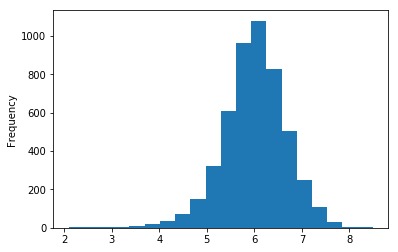

In [9]:
credit['total_spent_ln'].plot.hist(bins=20)

**Checking for Missing Values**

In [10]:
credit.isnull().sum().value_counts()

0       115
2         3
3296      2
3656      2
2622      2
3         2
1         2
1422      1
1419      1
dtype: int64

    -Variable whose Missing Value is Greater than 25%, Droping that Variables.

In [11]:
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))

Number of numerical variables  :46
Number of categorical variables:84


In [12]:
mis=credit.isnull().sum()
print "Variable with Percentage of Missing Value"
print "-"*41
totalx=5000.00
for var in mis.index:
    t=mis[var]/totalx
    t=t*100
    if t>= 25.00:
        # updating the numerical/categorical list..
        list_update(var)
        print '{0}:{1}'.format(var,t)
        credit.drop(var,axis=1,inplace=True)

print "-"*41
print "These variable have been dropped...."

Variable with Percentage of Missing Value
-----------------------------------------
lntollmon:52.44
lntollten:52.44
lnequipmon:65.92
lnequipten:65.92
lncardmon:28.38
lncardten:28.44
lnwiremon:73.12
lnwireten:73.12
-----------------------------------------
These variable have been dropped....


In [13]:
## MIssing values will treated afterward......
credit.isnull().sum().value_counts()

0    115
2      3
3      2
1      2
dtype: int64

###### Data Description

In [14]:
# Creating Data audit Report
# Use a general function that returns multiple values    
credit_num=credit[numerical_var]
def var_summary(x):
    return pd.Series([x.mean(),x.isnull().sum(), x.count(), x.sum(), x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['MEAN','NMISS','N', 'SUM','STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])
 
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary.to_excel(writer,'Numerical_Variable Summary',index=True)
num_summary.head()

,MEAN,NMISS,N,SUM,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,47.025600,0.0,5000.0,235128.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,14.543000,0.0,5000.0,72715.000000,3.281083,10.765504,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,54.759600,0.0,5000.0,273798.000000,55.377511,3066.668742,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,3.699909,0.0,5000.0,18499.546992,0.747072,0.558116,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,9.954160,0.0,5000.0,49770.800000,6.399783,40.957226,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000


In [15]:
pp.ProfileReport(credit)

Number of variables,122
Number of observations,5000
Total Missing (%),0.0%
Total size in memory,4.7 MiB
Average record size in memory,976.0 B
Numeric,59
Categorical,1
Boolean,49
Date,0
Text (Unique),0
Rejected,13


**From the above profile report, we found that these variables are highly correlated...**

    -addresscat is highly correlated with address (ρ = 0.92352) Rejected
    -agecat is highly correlated with age (ρ = 0.96988) Rejected
    -card2tenure is highly correlated with cardtenure (ρ = 0.96298) Rejected
    -card2tenurecat is highly correlated with card2tenure (ρ = 0.92439) Rejected
    -commutecat is highly correlated with commute (ρ = 0.98117) Rejected
    -edcat is highly correlated with ed (ρ = 0.9639) Rejected
    -equipmon is highly correlated with equip (ρ = 0.94719) Rejected
    -inccat is highly correlated with lninc (ρ = 0.95154) Rejected
    -lnlongten is highly correlated with lnlongmon (ρ = 0.92147) Rejected
    -longten is highly correlated with longmon (ρ = 0.98281) Rejected
    -spoused is highly correlated with marital (ρ = 0.95577) Rejected
    -spousedcat is highly correlated with spoused (ρ = 0.98403) Rejected
    -tenure is highly correlated with card2tenure (ρ = 0.92824) Rejected

**So we will drop these variables**
    - ['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','inccat','lnlongten',
            'longten', 'spoused','spousedcat','tenure']

In [16]:
# Creating universal drop list, so that variables to be dropped gets added in the list..
drop_list=[]

In [17]:
# Droping the numerical variable while adding categorical variable to drop_list for later drop..
# ....This is done to insure dummy variable creation of that categorical variables.

dplist=['addresscat','agecat','card2tenure','commutecat','edcat','equipmon','inccat','lnlongten',
            'longten', 'spoused','spousedcat','tenure']

print "-"*41
for var in dplist:
    if var in cat_var:
        drop_list.append(var)
    else:       
        print var
        list_update(var)
        credit.drop(var,axis=1,inplace=True)
print "-"*41
print "These variable have been dropped...."   

-----------------------------------------
equipmon
lnlongten
longten
spoused
tenure
-----------------------------------------
These variable have been dropped....


#### Missing Value Treatment.

In [18]:
for col in credit:
    #get dtype for column
    dt = credit[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        credit[col].fillna(credit[col].mean(),inplace=True)
credit.to_excel(writer,'Missing Value Treatment',index=True)

In [19]:
# Checking If it still contain any missing Values..
credit.isnull().sum().value_counts()

0    117
dtype: int64

##### Outlier Treatment

In [20]:
for col in credit:
    #get dtype for column
    dt = credit[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        credit[col]=credit[col].clip_upper(credit[col].quantile(0.99))
        credit[col]=credit[col].clip_lower(credit[col].quantile(0.01))
credit.to_excel(writer,'Outlier_Treatment',index=True)

#### Factor Analysis

In [21]:
credit.columns.size

117

In [22]:
credit_num=credit[numerical_var]
factor=FactorAnalysis(14).fit(credit_num)
F_analysis=pd.DataFrame(factor.components_,columns=numerical_var).T
F_analysis=F_analysis.add_prefix('Factor')
F_analysis.to_excel(writer,'Factor Analysis',index=True)
F_analysis.head()

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13
age,4.984529,5.393886,4.047500,0.271251,2.000740,-15.373072,-0.826551,0.258723,-1.780838,0.196863,0.155255,-0.085909,-0.026959,0.026626
ed,0.649698,-1.151658,0.032214,-0.005142,0.501191,0.275551,0.111079,-0.121205,-0.345586,0.469876,-0.040137,0.073287,0.088050,-0.256883
income,16.484490,3.857810,-2.784041,-0.415150,52.537841,0.754526,-0.193404,3.101552,-0.101318,-0.010093,-0.007137,0.020043,-0.062618,0.000646
lninc,0.206898,0.029375,-0.040852,0.009587,0.570281,0.017666,0.008435,-0.180959,-0.016961,0.008747,-0.007387,-0.047921,0.061414,-0.003718
debtinc,0.081811,0.010202,0.078538,-0.010204,0.105166,-0.220002,-0.036866,-0.035460,-0.062810,-0.081226,0.016965,0.046004,5.776527,0.018577


In [23]:
credit.dtypes.value_counts()

int64      97
float64    19
object      1
dtype: int64

##### Dummy Variable Creation

Converting Categorical/Object into Numerical Variable.

In [24]:
from time import strptime
def tomonth(x):
    month_name= x
    month_number=strptime(month_name, '%B').tm_mon
    return month_number

credit['birthmonth']=credit['birthmonth'].map(lambda x: tomonth(x))

In [25]:
print len(drop_list)
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))

7
Number of numerical variables  :33
Number of categorical variables:84


In [26]:
# Creating Dummy variable for Catagorical Variables and droping its original Variables.
#.........
# Dummy Creation is done on only these variables because remaning variables are already in dummy form..

cat_to_dum=['region','townsize','gender','agecat','edcat','empcat','inccat','jobsat','spousedcat',
         'hometype','addresscat','cars','carown','cartype','carcatvalue',
         'carbought','commutecat','reason','polview','card','cardtype','cardbenefit',
         'cardtenurecat','card2','card2type','card2benefit','card2tenurecat',
         'bfast','internet']

credit['townsize']=credit['townsize'].astype(int)
dum_var=[] #list of  newly created dummy variables.. 
for var in cat_to_dum:
    if var in credit:
        col_dummies = pd.get_dummies(credit[var], prefix=var+'_dummy')
        credit=pd.concat([credit,col_dummies],axis=1)
        if var not in drop_list:
            drop_list.append(var)
        for col in list(col_dummies.columns):
            dum_var.append(col)

In [27]:
print len(dum_var)
print len(cat_to_dum)
print len(drop_list)
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))
print credit.shape

135
29
30
Number of numerical variables  :33
Number of categorical variables:84
(5000, 252)


##### Feature Reduction

In [28]:
# Droping all the variable accumulated in drop_list..
list_drop(drop_list)

In [29]:
dplist=['income','creddebt','othdebt']
#Droping these variables because log of these varibales are already present in the data.
# These are Redundant variables    
list_drop(dplist)

In [30]:
print len(dum_var)
print len(cat_to_dum)
print ('Number of numerical variables  :{}'.format(len(numerical_var)))
print ('Number of categorical variables:{}'.format(len(cat_var)))
print credit.shape

135
29
Number of numerical variables  :30
Number of categorical variables:54
(5000, 219)


In [31]:
credit.head(2)

,age,birthmonth,ed,jobcat,union,employ,retire,lninc,debtinc,lncreddebt,...,card2tenurecat_dummy_4,card2tenurecat_dummy_5,bfast_dummy_1,bfast_dummy_2,bfast_dummy_3,internet_dummy_0,internet_dummy_1,internet_dummy_2,internet_dummy_3,internet_dummy_4
0,20,9,15,1,1,0,0,3.433987,11.1,0.183079,...,0,0,0,0,1,1,0,0,0,0
1,22,5,17,2,0,0,0,2.708050,18.6,0.200505,...,0,0,1,0,0,0,0,0,0,1


**Correlation Matrix of all the categorical variable and dummy variables **

In [32]:
# creating List of  dummy var and categorical var.
corr_list=dum_var + cat_var
credit_corr=credit[corr_list]
corr=pd.DataFrame(credit.corr())
corr_spent=pd.DataFrame(corr['total_spent_ln'])
corr_spent.to_excel(writer,'Correlation_ln',index=True)
corr_spent.head()

,total_spent_ln
age,0.007270
birthmonth,0.019323
ed,0.098565
jobcat,-0.010592
union,0.021191


_____________________

### Model Building

In [33]:
#Splitting the data
feature_columns = credit.columns.difference( ['total_spent_ln'] )
train_X, test_X, train_y, test_y = train_test_split(credit[feature_columns],
                                                  credit['total_spent_ln'],
                                                  test_size=0.3,
                                                  random_state=125)
print len( train_X )
print len (train_y)
print len( test_X)
print len( test_y)
print credit.shape

3500
3500
1500
1500
(5000, 219)


#### 1. Linear Regression

In [34]:
## Methood 1..
clf_linear= LinearRegression()
clf_linear.fit(train_X, train_y)
y_pred_linear=clf_linear.predict(test_X)
acc_linear=round( clf_linear.score(test_X,test_y) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:66.5 percent


In [35]:
acc_linear=round( clf_linear.score(train_X, train_y) * 100, 2)
print ('score:'+str(acc_linear) + ' percent')

score:71.38 percent


In [36]:
print 'MSE:{}'.format(mse(y_pred_linear,test_y))
print 'R Sqr:{}'.format(r2(test_y,y_pred_linear))

MSE:0.135289058419
R Sqr:0.665008608489


#### 2. Random Forest

In [37]:
clf_rf= RandomForestRegressor(n_estimators=100)
clf_rf.fit(train_X, train_y)
y_pred_rf= clf_rf.predict(test_X)
acc_rf = round( clf_rf.score(test_X,test_y) * 100, 2)
print (str(acc_rf) + ' percent')

66.68 percent


#### 3. Decision Tree


In [38]:
clf_dt=DecisionTreeRegressor()
clf_dt.fit(train_X, train_y)
y_pred_dt= clf_dt.predict(test_X)
acc_dt = round( clf_dt.score(test_X, test_y) * 100, 2)
print (str(acc_dt) + ' percent')

27.96 percent


#### Comparing Models
Let's compare the accuracy score of all the regression models used above.

In [39]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Decision Tree', 'Random Forest'],
    
    'Score': [acc_linear,acc_dt,acc_rf]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Linear Regression,71.38
2,Random Forest,66.68
1,Decision Tree,27.96


___________

Model Output:

In [40]:
lm=sm.OLS(train_y,train_X).fit()

In [41]:
f=open('model Summary.csv','w')
#f.write(lm.summary().as_csv())
f.write(lm.summary().as_latex())
f.close()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         total_spent_ln   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     45.19
Date:                Wed, 22 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:00:20   Log-Likelihood:                -1263.2
No. Observations:                3500   AIC:                             2894.
Df Residuals:                    3316   BIC:                             4028.
Df Model:                         183                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
active                     0.0068      0.013      0.515      0.606      -0.019       0.032
address                    0.0015      0.002      0.824      0.410      -0.002       0.005
addresscat_dummy_1         0.1164      0.035      3.316      0.001       0.048       0.185
addresscat_dummy_2         0.1384      0.023      6.085      0.000       0.094       0.183
addresscat_dummy_3         0.1197      0.016      7.407      0.000       0.088       0.151
addresscat_dummy_4         0.0913      0.020      4.584      0.000       0.052       0.130
addresscat_dummy_5         0.0695      0.037      1.853      0.064      -0.004       0.143
age                       -0.0040      0.002     -2.165      0.030      -0.008      -0.000
agecat_dummy_2             0.0146      0.044      0.334      0.738      -0.071       0.101
agecat_dummy_3             0.0549      0.028      1.990      0.047       0.001       0.109
agecat_dummy_4             0.0932      0.017      5.472      0.000       0.060       0.127
agecat_dummy_5             0.1605      0.028      5.799      0.000       0.106       0.215
agecat_dummy_6             0.2120      0.048      4.454      0.000       0.119       0.305
bfast_dummy_1              0.1914      0.015     12.659      0.000       0.162       0.221
bfast_dummy_2              0.1566      0.017      9.434      0.000       0.124       0.189
bfast_dummy_3              0.1873      0.015     12.838      0.000       0.159       0.216
birthmonth                 0.0027      0.002      1.512      0.131      -0.001       0.006
callcard                  -0.0167      0.022     -0.762      0.446      -0.060       0.026
callid                     0.0196      0.019      1.052      0.293      -0.017       0.056
callwait                   0.0019      0.018      0.105      0.916      -0.034       0.038
carbought_dummy_-1         0.1431      0.013     10.997      0.000       0.118       0.169
carbought_dummy_0          0.1890      0.015     12.201      0.000       0.159       0.219
carbought_dummy_1          0.2032      0.016     13.063      0.000       0.173       0.234
carbuy                     0.0037      0.013      0.275      0.783      -0.023       0.030
carcatvalue_dummy_-1       0.1431      0.013     10.997      0.000       0.118       0.169
carcatvalue_dummy_1        0.1141      0.022      5.076      0.000       0.070       0.158
carcatvalue_dummy_2        0.1115      0.016      6.844      0.000       0.080       0.143
carcatvalue_dummy_3        0.1666      0.031      5.448      0.000       0.107       0.227
card2_dummy_1              0.3295      0.016     20.402      0.000       0.298       0.361
card2_dummy_2              0.0558      0.015      3.848      0.000       0.027       0.084
card2_dummy_3              0.0243      0.014      1.731      0.083      -0.003  

######  Feature Importance

In [52]:
# Using Random Forest
ce=pd.DataFrame(clf_rf.feature_importances_, train_X.columns)
ce.columns=['Coefficients']
ce.sort_values('Coefficients',ascending=False,inplace=True)
ce['Coefficients']=((ce['Coefficients'])*100).round(2)
ce=ce.head(10)
ce.to_excel(writer,'Variable_imp',index=True)

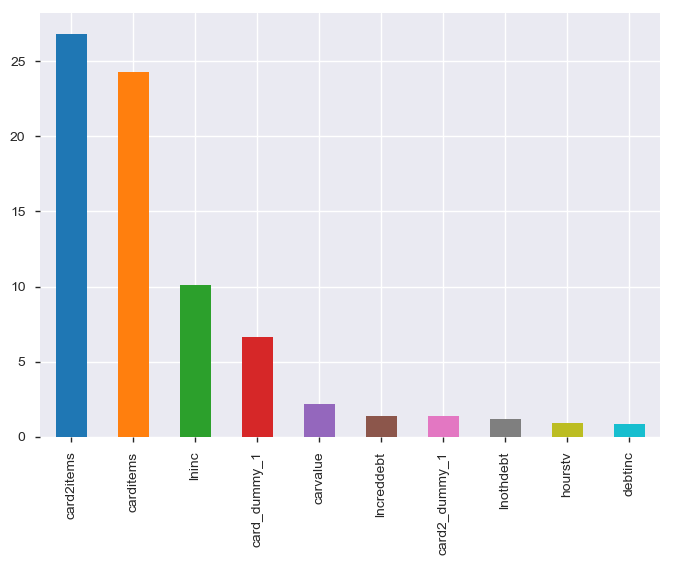

In [53]:
ce=ce.head(12)
ce.Coefficients.plot(kind='bar')

    *************** THE END *********************************************************************************************